# Simulador Doppler

EL objetivo es construir un simulador que ilustre el efecto Doppler. 
En él aparecerá un animación en la que se mostrará un emisor y un receptor.
Alrededor del emisor aparecerán circunferencias concentricas ilustrando la emisión.
El tiempo entre aparición de un círculo y otro será ajustable.

Podrán estar en movimiento el emisor, el receptor o ambas


--Extra--
El usuario podrá cargar audios propios (de corta duración o recortados) y escuchar como sonarían bajo los efectos de Doppler


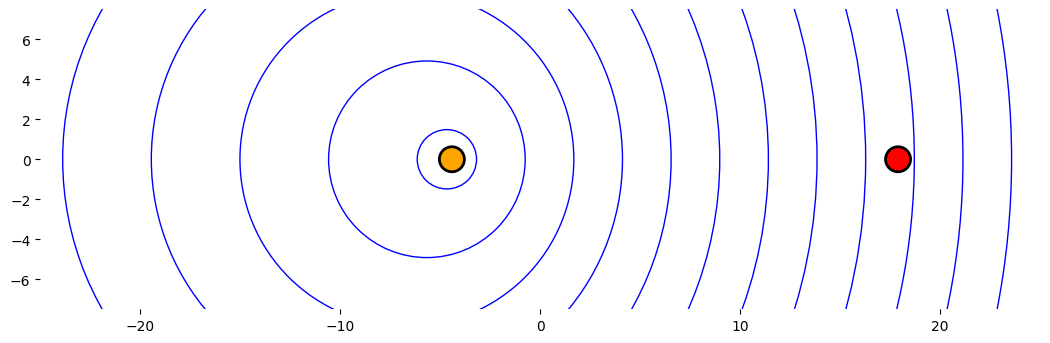

In [76]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np



# Función para actualizar la animación en cada cuadro
def update_anim(frame):
    # Calcular la posición x del círculo en función del tiempo (frame)
    x_emisor = posicion_inicial_emisor_x + frame * velocidad_emisor
    x_receptor = posicion_inicial_receptor_x + frame * velocidad_receptor

    # Coordenadas cartesianas del círculo
    theta = np.linspace(0, 2 * np.pi, 100)
    y = np.sin(theta)

    # Actualizar la posición del punto
    circle_emisor.set_center((x_emisor, posicion_inicial_emisor_y))
    circle_emisor_border.set_center((x_emisor, posicion_inicial_emisor_y))

    circle_receptor.set_center((x_receptor, posicion_inicial_receptor_y))
    circle_receptor_border.set_center((x_receptor, posicion_inicial_receptor_y))

    # Actualizar los radios de las circunferencias anteriores con una velocidad de crecimiento ajustada
    #velocidad_propagacion = 0.01  # Velocidad de crecimiento de los círculos
    for c in circles:
        c.set_radius(c.get_radius() + velocidad_propagacion)  # Incremento del radio

    # Crear y dibujar una nueva circunferencia en intervalos regulares
    if frame % intervalo_emision == 0 and frame!=0:
        linewidth = 1  # Grosor de la línea de las circunferencias azules
        new_circle = plt.Circle((x_emisor, posicion_inicial_emisor_y), circle_emisor.radius, color='blue', fill=False, linewidth=linewidth)
        ax.add_artist(new_circle)
        circles.append(new_circle)

    return circle_emisor, circle_emisor_border, *circles


# Crear la figura y los ejes
fig = plt.figure(figsize=(10,3))
ax = fig.add_axes((0,0,1,1), frameon=False) #Frameon = Flase quita el are de afuera de los ejes.
#ax.axis('off')
ax.set_frame_on=False




# Parámetros controlables
escala = 1/40
escala_velocidad = 1/10
# Establecer límites de los ejes
dim_x = 2000 * escala
dim_y = 600 * escala
ax.set_xlim(-dim_x/2, dim_x/2)
ax.set_ylim(-dim_y/2, dim_y/2)

# Variables para almacenar las circunferencias creadas
circles = []

    #Parámetros físicos
posicion_inicial_emisor_x = -dim_x/3 # Posición inicial en el eje x del emisor
posicion_inicial_emisor_y = 0  # Posición inicial en el eje y del emisor
velocidad_emisor = 10 * escala  # Velocidad del emisor. (m/s)
posicion_inicial_receptor_x = dim_x/3  # Posición inicial en el eje x del receptor
posicion_inicial_receptor_y = 0  # Posición inicial en el eje y del receptor
velocidad_receptor = 1 * escala  # Velocidad del receptor. (m/s)
velocidad_propagacion = 343.2 * escala * escala_velocidad # Velocidad de proagación de la onda. (m/s)

    # Parámetros de la animación
radio_inicial = (dim_x/2) * escala  # Radio inicial de los círculos de las emisiones.
intervalo_emision = 4  # Intervalo entre emisiones. Propósitos gráficos



# Dibujar el punto original en la posición inicial como un círculo naranja
circle_emisor = plt.Circle((posicion_inicial_emisor_x, posicion_inicial_emisor_y), radio_inicial, color='orange', fill=True)
ax.add_artist(circle_emisor)
# Dibujar el borde del punto original en la posición inicial como una circunferencia negra
circle_emisor_border = plt.Circle((posicion_inicial_emisor_x, posicion_inicial_emisor_y), radio_inicial, color='black', fill=False, linewidth=2)
ax.add_artist(circle_emisor_border)

# Dibujar el punto original en la posición inicial como un círculo rojo
circle_receptor = plt.Circle((posicion_inicial_receptor_x, posicion_inicial_receptor_y), radio_inicial, color='red', fill=True)
ax.add_artist(circle_receptor)
# Dibujar el borde del punto original en la posición inicial como una circunferencia negra
circle_receptor_border = plt.Circle((posicion_inicial_receptor_x, posicion_inicial_receptor_y), radio_inicial, color='black', fill=False, linewidth=2)
ax.add_artist(circle_receptor_border)


# Crear la animación
anim = animation.FuncAnimation(fig, update_anim, frames=50, interval=50, blit=True)

# Mostrar la animación
HTML(anim.to_jshtml())


In [31]:
# Variables físicas



# Efecto Doppler
def Doppler(v_f, v_r, f_0):

    # f_0 : Frecuencia de la emisión (Hz)
    # v : velocidad del sonido. v = 343,2 m/s
    # v_r : velocidad del receptor (m/s). Positiva si la fuente se aleja del receptor
    # v_f : velocidad de la fuente (m/s). Positiva si la fuente se acerca al receptor
    
    v = 343.2
    f = (v - v_r)/(v - v_f) * f_0

    return f

# Conversión de velocidades

def kmh_to_ms(kmh):
    return kmh*3600/1000

In [33]:
Doppler(kmh_to_ms(20), 0, 500) # Un cambio grande para una velocidad relativamente baja!!

632.7433628318583